In [15]:
from sklearn.datasets import fetch_mldata
import numpy as np

In [16]:
mnist = fetch_mldata('MNIST original')

In [17]:
X, y = mnist["data"] , mnist["target"]

In [21]:
%matplotlib inline

In [23]:
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

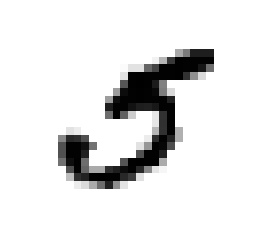

In [26]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
shuffle_index = np.random.permutation(60000)

In [35]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test==5)

In [40]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd_clf = SGDClassifier(random_state=42)

In [44]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [69]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [47]:
from sklearn.model_selection import cross_val_score

Split the training set into 3 sub sets and randomly selects a set and tests it with the other 2 sets

In [48]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9634 ,  0.96665,  0.95625])

This class below is a classifier that never classifies an image as 5

In [49]:
from sklearn.base import BaseEstimator

In [55]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [56]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.90945,  0.9096 ,  0.9099 ])

In [57]:
from sklearn.model_selection import cross_val_predict

In [58]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_train_5, y_train_predict)

array([[53228,  1351],
       [  923,  4498]])

In [61]:
from sklearn.metrics import precision_score, recall_score

In [63]:
precision_score(y_train_5, y_train_predict)

0.76902034535818087

In [64]:
recall_score(y_train_5, y_train_predict)

0.82973621103117501

In [65]:
from sklearn.metrics import f1_score

In [66]:
f1_score(y_train_5, y_train_predict)

0.79822537710736474

In [71]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 132058.11142846])

In [72]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [73]:
y_some_digit_pred

array([ True], dtype=bool)